# Subject: Molecular Orbital Theory (MOT)
In this project, we investigate carbon molecules in different structures (Benzene, BuckyBall, Butadiene, Naphthalene, Toluene) by using Huckel(H) theory for pi-molecular orbitals.

## Introduction
The numerical matrices for different materials calculates the band level energies and plot the structure of the carbon hexagonal molecule.
The structure of the codes contains different loops and numerical calculation of coefficients.
Basic files and repositories built the different packages that during the below explanation refers to them.

### structure:
     
- Projects: The repository contains two files that are the main body of the project.
            Project_1: Creats the basic molecule of a & b use the chains for samples.
            Project_2: calls the molecule's chain from project_1 and extends our Molecule class to built
            the Graphene structure.
                           
- Bonds:    There are two different groups of files
          " Armchair calls the graphene from project_2 and creat connection between atoms."
          " Molecules that call from project_1 the molecule's structure and use it to create the correct
            position of the molecule band."
                 
- Zigzag:   By considering the hexagonal construction of the graphene molecule creates the matrix of charge density and calculates the delocalization energy.
                 
- Nanotube: It is the same as zigzag, The difference is that Nanotube calls armchair (however zigzag callsproject_2) and consider the direct connections.
     
- Graphs:   Plots the levels of zigzag and armchair.


### Libraries:
   numpy , sympy , matplotlib.pyplot

## Project_1

For a given matrix H, with Alpha diagonals and Beta off-diagonals, we will determine the Eigenvalues and Eigenvectors. for the Huckel Effective Hamiltonian and use them to create an energy level diagram for the electronic configuration of the molecule. In this case, we want to create a class that represents a molecule with a Huckel Matrix and associated methods. Then, plot energy level and direction of atoms in the structures. During the code, after defining Eigenvalue and Eigenvector, the string representation for the molecule is described (Charge Density, deloc Energy & Bond Order). Then, definition numerical matrix elements are required by codes for linear carbon chain. So, denoting spin for electrons from the energy levels clarifies the plot of each bond. Besides, we find the bond order of the molecule.

### Libraries¶
    - libraries are collections of functions and classes that allows to reuse well-written code (from you or from somebody else) in your new code.
    - to import a library you can do it in several ways.
    - whatever you need to implement, it is usually worth checking if there is already a library doing it for you.

In [9]:
import numpy as np
from numpy import linalg as lig
import sympy as smp
import matplotlib.pyplot as plt
from operator import itemgetter
import collections

    the most commonly imported libraries are usually imported with standard shorter names, and you will see 
    most code using these conventions. Don't stray from conventions unless you need why you are doing it.

    in scientific code, the most common ones are:

    - import numpy as np
    - import pandas as pd
    - import pylab as plt


    "Preface:
    Part A - Huckel(H) theory for pi-molecular orbitals.
    For a given matrix H, with Alpha diagonals and Beta off-diagonals, we will determine the Eigenvalues
    and Eigenvectors for the Huckel Effective Hamiltonian and use them to create an energy level diagram
    for the electronic configuration of the molecule."

In [10]:
"""
Preface:
Part A - Huckel(H) theory for pi-molecular orbitals.
For a given matrix H, with Alpha diagonals and Beta off-diagonals, we will determine the Eigenvalues and Eigenvectors
for the Huckel Effective Hamiltonian and use them to create an energy level diagram for the electronic configuration
of molecule.
"""

a, b = smp.symbols('a, b')  # Generate symbols so we can use them in our fancy matrix

#### Objects¶
    they store data and provide a layer to interact with these data.
    Now the class represents a molecule with a Huckel Matrix and associated methods.
    object customization:

In [11]:
class Molecule:
    """This class represents a molecule with a Huckel Matrix and associated methods"""

    def __init__(self, name, H, num_pi_electrons, num_carbons, num_double_bonds):
        self.H = H
        self.name = name
        self.num_carbons = num_carbons
        self.eigenvalues = []
        self.eigenvectors = []
        self.normalized_eigenvectors = []
        self.eigval_eigvect = []         # Associate Eigenvalue with its Eigenvect
        self.eigval_multiplicity = []
        self.num_pi_electrons = num_pi_electrons
        self.deloc_energy = 0.0
        self.alpha = None
        self.beta = None
        self.charge_density = []
        self.bond_order = []
        self.num_additional_connections = 0
        self.con = []
        self.num_double_bonds = num_double_bonds

        # This is our internal data structure that contains [(eig_value, # of Electrons)]
        self.e_per_energy_lvl = []
        self.e_per_eigen_vect = []

    Once we have an instance of an object, we can store and retrieve attributes in that object.

    These represents the data that are stored inside the object. Having them inside the object allows us to
    keep them all together and give them some form of identity.

### functions and routines
    From the language perspective of python they are the same thing, but from a conceptual perspective, they
    are very different.

- routines do something to the system, and usually don't return anything interesting (like printing).
- functions create new objects from the inputs, but don't modify the input themselves
they are both referred as functions, and can do both, but try to know which is which and plan accordingly.

And try to avoid to mix the two.

An inportant concept related to functions is the concept of scoping.

When we execute a function we can use variables that are reserved to the function.

This allow to write simpler code.

## This is our internal data structure that contains [(eig_value, # of Electrons)]

"""Create the string representation for the molecule"""

In [12]:
    def __str__(self):
        """Create the string representation for the molecule"""
        return "---" + self.name + "--- \n" + str(self.H) + "\n" \
               + "Charge Density :" + str(self.charge_density) + "\n" \
               + "Delocalization Energy :" + str(self.deloc_energy) + "\n" \
               + "Bond Order :" + str(self.bond_order) + "\n"

Now we need the function that substitutes numeric value in place for Alpha and Beta in the Huckel Matrix.
Then Replace our H matrix with numerical values and Store the resonance integral values.

In [13]:
    def set_constants(self, al, be):
        """This function substitutes numeric value in place for Alpha and Beta in the Huckel Matrix"""

        # Replace our H matrix with numerical values
        self.H = np.matrix([[al if x == a else be if x == b else x for x in i] for i in self.H.tolist()])

        # Store the resonance integral values
        self.alpha = al
        self.beta = be

### generates H matrix for linear carbon chain
Use the loop formate to creat carbon chain matrix and calculate the numerical matrix elements.

In [14]:
    def generate_H(self):
        """generates H matrix for linear carbon chain"""
        N = self.num_carbons
        H = np.zeros((N, N)).tolist()

        for i in range(N):
            H[i][i] = a
            if i == 0:
                H[i][i + 1] = b
            elif i == N - 1:
                H[i][i - 1] = b
            else:
                H[i][i + 1] = b
                H[i][i - 1] = b

        self.H = np.matrix(H)

adds con to the Huckel matrix, takes a list of lists and inserts beta into H at the
specified coordinates. con: [[coord1, coord2]...]

In [15]:
    def add_connections(self, con):
        """adds con to the Huckel matrix, takes a list of lists and inserts beta into H at the
        specified coordinates
        con: [[coord1, coord2]...]
        """
        self.con = con
        for i in range(len(con)):
            self.H[con[i][0] - 1, con[i][1] - 1] = b
            self.H[con[i][1] - 1, con[i][0] - 1] = b
        self.num_additional_connections += len(con)

deletes con to the Huckel matrix, takes a list of tuples and inserts zero into H at the specified coordinates. 
con: [[coord1, coord2]...]

In [16]:
    def delete_connections(self, con):
        """deletes con to the Huckel matrix, takes a list of tuples and inserts zero into H at the
        specified coordinates
        con: [[coord1, coord2]...]
        """

        for i in range(len(con)):
            self.H[con[i][0] - 1, con[i][1] - 1] = 0
            self.H[con[i][1] - 1, con[i][0] - 1] = 0
        self.num_additional_connections -= len(con)

Finds the eigenvalue and eigenvector for the H matrix

In [17]:
    def generate_eigen(self):
        """Finds the eigenvalue and eigenvector for the H matrix"""
        assert(self.alpha is not None and self.beta is not None)    # We are no longer using symbolic evals

        # Reset our arrays
        self.eigenvalues = []
        self.eigenvectors = []
        self.eigval_multiplicity = []
        self.eigval_eigvect = []

        e_vals, e_vects = lig.eig(self.H)                     # Generate using Numpy's eigenvals
        e_vals = np.around(e_vals, decimals=5)                    # Round these eigen values
        freq_dict = collections.Counter(e_vals)                   # Counts up # of Eigenvalue and their multiplicity

        # Store the eigenvalues along with their multiplicities. Note: Eigenvalues in this array is unique
        self.eigval_multiplicity = sorted(freq_dict.items(), key=lambda x: x[0])

        # Associate each eigenvalues with their eigenvectors. Note: Eigenvalues may repeat in this array
        for i in range(len(e_vals)):
            eigenvalue = e_vals[i]
            mega_tuple = tuple([eigenvalue, e_vects[:, i]])
            self.eigval_eigvect.append(mega_tuple)

        # Sort our eigval_eigvect list, in ascending eigenvalue order
        self.eigval_eigvect.sort(key=lambda x: x[0])

        # Store just the eigenvalues and the eigenvectors in the appropriate arrays
        for eig_set in self.eigval_eigvect:
            self.eigenvalues = eig_set[0]
            self.eigenvectors.append(eig_set[1].tolist())

        # Reset the array which will hold the number of electrons per eigenvalue
        self.e_per_energy_lvl = []

        # Compile our electron per energy level array
        electrons_available = self.num_pi_electrons
        for eig_val_multiplicity in self.eigval_multiplicity:
            eig_val = eig_val_multiplicity[0]
            multiplicity = eig_val_multiplicity[1]
            if electrons_available >= (multiplicity * 2):
                self.e_per_energy_lvl.append(tuple([eig_val, 2 * multiplicity]))
                electrons_available -= 2 * multiplicity
            else:
                self.e_per_energy_lvl.append(tuple([eig_val, electrons_available]))
                electrons_available -= electrons_available

        # Count up the number of electrons associated with each eigenvector by associating it with the eigenvalue
        self.e_per_eigen_vect = []
        e_per_energy_lvl_copy = [x for x in self.e_per_energy_lvl]      # Get a temporary copy to work with

        for eig_set in self.eigval_eigvect:
            eig_val = eig_set[0]            # Eigenvalue
            eig_vect = eig_set[1]           # Eigenvectors
            electrons = 0

            for electron_index in range(len(e_per_energy_lvl_copy)):
                if e_per_energy_lvl_copy[electron_index][0] == eig_val:
                    # We have a match of eigenvalues
                    if e_per_energy_lvl_copy[electron_index][1] > 2:
                        # pull out 2
                        electrons = 2
                        e_per_energy_lvl_copy[electron_index] = tuple([e_per_energy_lvl_copy[electron_index][0],
                                                                       e_per_energy_lvl_copy[electron_index][1] - 2])
                    else:
                        # Pull out as many as it has
                        electrons = e_per_energy_lvl_copy[electron_index][1]
                        e_per_energy_lvl_copy[electron_index] = tuple([e_per_energy_lvl_copy[electron_index][0], 0])

            self.e_per_eigen_vect.append(tuple([eig_vect, electrons]))

#### Finding the nodes for the Eigenvector is the next step to creat main chain
    A helper function that count the number of nodes for a specific eigenvector.

In [18]:
    def find_nodes(self):
        """Finds the nodes for the Eigenvector"""

        def find_nodes_helper(eigenvector):
            """ A helper function that count the number of nodes for a specific eigenvector"""

            nodes = 0  # Number of Nodes
            for i in range(len(eigenvector) - 1):
                if eigenvector[i] * eigenvector[i + 1] < 0:
                    nodes += 1  # We have a node
            return nodes

        result = []
        for eigvector in self.eigenvectors:
            result.append(find_nodes_helper(eigvector))

        # Result = [num_nodes, ...]
        return result

Plots the energy levels and denote spin for the electrons

In [19]:
    def energy_level_plot(self):   
        """Plots the energy levels and denoate spin for the electrons"""
        assert(self.alpha is not None and self.beta is not None)  # Make sure alpha and beta are defined

        # Get the unicode arrow
        down_arrow = u'$\u2193$'
        up_arrow = u'$\u2191$'

        electrons_used = self.num_pi_electrons
        max_multiplicity = max(self.eigval_multiplicity, key=itemgetter(1))[1]      # Count the maximum multiplicity

        # Draw the graphs by iterating through each eigenvalue and its associated multiplicity
        for eig in self.eigval_multiplicity:
            eig_val = eig[0]
            if eig[1] == 1:
                plt.axhline(eig[0])  # Draw the eigenvalues as lines on the graph
            else:
                for i in range(eig[1]):
                    plt.plot([i, i + 0.95], 2 * [eig_val],
                             color=np.random.rand(3, ))

            # Fill up to two electrons per level per line, from bottom up
            if eig[1] == 1:
                if electrons_used > 1:
                    plt.plot(0.2 * max_multiplicity, eig_val, linestyle='none', marker=up_arrow, markersize=15)
                    plt.plot(0.8 * max_multiplicity, eig_val, linestyle='none', marker=down_arrow, markersize=15)
                    electrons_used -= 2
                elif electrons_used == 1:
                    plt.plot(0.2 * max_multiplicity, eig_val, linestyle='none', marker=up_arrow, markersize=15)
                    electrons_used -= 1

                else:
                    pass
            else:
                for i in range(eig[1]):
                    # Add all the up arrows
                    if electrons_used >= 1:
                        plt.plot(0.2 + i, eig_val, linestyle='none', marker=up_arrow, markersize=15)
                        electrons_used -= 1
                for i in range(eig[1]):
                    # Add all the up arrows
                    if electrons_used >= 1:
                        plt.plot(0.8 + i, eig_val, linestyle='none', marker=down_arrow, markersize=15)
                        electrons_used -= 1

        # Draw the graphs
        plt.title('Energy Level Plot for ' + str(self.name))
        plt.xlim(0, max_multiplicity)  # Format the Graph
        plt.xticks([])  # Hide the x-axes
        plt.ylabel('Energy')
        plt.show()

Calculates the delocalization energy by going through our augmented array and adding up all the energies.

In [20]:
    def find_deloc_energy(self):
        """Calculates the delocalization energy by going through our augmented array and adding up all the energies"""

        deloc_energy = 0.0
        for e, num_electrons in self.e_per_energy_lvl:
            deloc_energy += e * num_electrons
        # We calculated the total Pi Electron Energy

        # Subtract Pi Electrons in Isolated Bonds
        deloc_energy -= (2 * a + 2 * b) * self.num_double_bonds

        if self.alpha is not None and self.beta is not None:
            # If we have the alpha and beta constants
            deloc_energy = deloc_energy.subs(a, self.alpha).subs(b, self.beta)

        self.deloc_energy = smp.N(deloc_energy)     # Set it nicely

        return self.deloc_energy

#### finds the charge density of Pi electrons for each carbon atom in the molecule
     Iterate through each eigenvector and its number of electrons and add up the charge sum according to that
     formula.

In [21]:
    def find_charge_density(self):
        """finds the charge density of Pi electrons for each carbon atom in the molecule"""
        charge_density = []

        for c in range(self.num_carbons):                           # For each carbon atom
            charge_sum = 0.0
            for eig_e in self.e_per_eigen_vect:
                """Iterate through each eigenvector and its number of electrons and add up the charge sum
                according to that formula """
                eig_vect_val = (eig_e[0][c].tolist())[0][0]
                charge_sum += eig_e[1] * (abs(eig_vect_val) ** 2)

            charge_density.append(charge_sum)

        self.charge_density = charge_density        # list of charge densities for carbon atoms 1-n

finds the bond order of molecule, stores as list of values beginning at C1

In [22]:

    def find_bond_order(self):
        """finds the bond order of molecule, stores as list of values beginning at C1"""

        bond_order = []

        for c in range(self.num_carbons - 1 + self.num_additional_connections):
            # For each carbon atom - 1 plus extra bonds between carbons

            bond_sum = 1.0

            # Iterate through our eigenvector and their associated number of electrons
            for eigv_e in self.e_per_eigen_vect:
                num_elec = eigv_e[1]

                if c < self.num_carbons - 1:
                    eigvector_at_c = (eigv_e[0][c].tolist())[0][0]
                    eigvector_at_c1= (eigv_e[0][c + 1].tolist())[0][0]
                    bond_sum += num_elec * eigvector_at_c * eigvector_at_c1
                else:
                    first_eigv_index = self.con[c % (self.num_carbons-1)][0]-1
                    eigv_1 = (eigv_e[0][first_eigv_index].tolist())[0][0]
                    second_eigv_index = self.con[c % (self.num_carbons-1)][1] - 1
                    eigv_2 = (eigv_e[0][second_eigv_index].tolist())[0][0]
                    bond_sum += num_elec * eigv_1 * eigv_2

            bond_order.append(bond_sum)

        self.bond_order = bond_order            # list of charge densities for carbon atoms 1-n



## Project_2

Now, our class is ready, afterward, in Project two, we extend our molecule class to be able to calculate the various properties of Graphene. The hexagonal structure of carbon is used for generating the chain. Now, the structure of each project is ready for calculating different carbon band structure in many bulks. But, before that, we need to consider Armchair as a Graphene molecule matrix calls from Project2. Zigzag matrix as a numerical calculation of neighbor connection in Graphen molecule for charge density and develop energy and plot them (creates a row of linking carbons to wrap zigzag). Nanotube works as a carbon tube for molecule to prepare the graphs.

In [23]:
class Carbon:
    def __init__(self, x, y, magnitudes, id):
        self.pos = (x, y)
        self.psi_magnitudes = magnitudes
        self.id = id        # Which carbon atom it is?


class Graphene(Molecule):
    def __init__(self, *args):
        super(Graphene, self).__init__(*args)
        self.carbons = [] # List of Carbon Atoms
        self.prev_id = 0 # Stores the id of the most recently generated carbon
        self.current_row = 1 # Stores the row of hexagons that the most recently generated carbon belongs to

In [24]:
    def generate_carbon(self, id, m, n, position_set):  # m is number of hexagon rows, n is number of hexagon columns
        """Mint a new Carbon atom"""
        mags = [(abs(eig[id - 1][0]) ** 2) for eig in self.eigenvectors]
        position = position_set
        if position_set == 'find':
            position = self.find_position(id, m, n)
        return Carbon(position[0], position[1], mags, id)

In [25]:
    def zig_zipper(self, m, n):
        """creates row of linking carbons to wrap zigzag"""
        a = 0.5 # Short leg of 30-60-90 triangle
        b = float((3**(1/2.0))/2.0) # long leg of 30-60-90 triangle
        carb_iter = self.num_carbons - (2*n + 1)
        pull_tab = copy.copy(self.carbons[carb_iter])
        self.carbons[carb_iter + 1].pos = (pull_tab.pos[0], pull_tab.pos[1]-2*b)
        t = copy.copy(self.carbons[carb_iter + 1])
        if m % 2 == 0:
            dist = 2
            for i in range(2*n-1):
                self.carbons[(carb_iter+2+i)].pos = (t.pos[0]-dist, t.pos[1])
                t = copy.copy(self.carbons[(carb_iter+2+i)])
                if dist == 2:
                    dist = 1
                else:
                    dist = 2

        else:
            dist = 2
            for i in range(2*n-1):
                self.carbons[(carb_iter+2+i)].pos = (t.pos[0]+dist, t.pos[1])
                t = copy.copy(self.carbons[(carb_iter+2+i)])
                if dist == 2:
                    dist = 1
                else:
                    dist = 2

In [26]:
    def find_position(self, id, m, n):
        """Finds the x, y coord of a specific carbon atom"""
        prev = self.prev_id
        xprev = 0
        yprev = 0
        if self.prev_id != 0:
            xprev = self.carbons[prev-1].pos[0]
            yprev = self.carbons[prev-1].pos[1]
        row = self.current_row
        a = 0.5 # Short leg of 30-60-90 triangle
        b = float((3**(1/2.0))/2.0) # long leg of 30-60-90 triangle

        if row == 1:
            if prev == 0:
                xpos = 0.0
                ypos = 0.0
            elif prev == 4 * n:
                xpos = xprev - a
                ypos = yprev - b  #(sqrt(3))/2
                self.current_row += 1
            else:
                if prev % 2 == 0:
                    xpos = xprev + 1
                    ypos = yprev
                else:
                    xpos = xprev + a
                    if id % 4 == 0:
                        ypos = yprev - b
                    else:
                        ypos = yprev + b
        elif row == 2:

            if prev == 4*n + (row-1)*(4*n - 1):
                xpos = xprev + a
                ypos = yprev - b
                self.current_row += 1
            else:
                if id % 2 == 0:
                    xpos = xprev - 1
                    ypos = yprev
                else:
                    xpos = xprev - a
                    if (id+row-1) % 4 == 0:
                        ypos = yprev - b
                    else:
                        ypos = yprev + b
        elif row == 3:

            if prev == 4*n + (row-1)*(4*n - 1):
                xpos = xprev
                ypos = yprev - 2*b
                self.current_row += 1
            elif prev == 4*n + (row-1)*(4*n -1) - 1:
                xpos = xprev + a
                ypos = yprev + b
            else:
                if prev % 2 == 0:
                    xpos = xprev + 1
                    ypos = yprev
                else:
                    xpos = xprev + a
                    if (id+row-1) % 4 == 0:
                        ypos = yprev - b
                    else:
                        ypos = yprev + b
        elif row == m + 1:

            if id == 4*n + 2*(4*n -1) + (row-3)*(2*n +2):
                if row % 2 == 0:
                    xpos = xprev - a
                    ypos = yprev + b
                else:
                    xpos = xprev + a
                    ypos = yprev + b
            elif prev == 4*n + 2*(4*n -1) + (row-4)*(4*n) + 1:
                ypos = yprev - b
                if row % 2 == 0:
                    xpos = xprev - a
                else:
                    xpos = xprev + a
            else:
                if row % 2 == 0:
                    if prev % 2 == 0:
                        xpos = xprev - 1
                        ypos = yprev
                    else:
                        xpos = xprev - 2
                        ypos = yprev
                else:
                    if prev % 2 == 0:
                        xpos = xprev + 1
                        ypos = yprev
                    else:
                        xpos = xprev + 2
                        ypos = yprev
        else:
            if prev == 4*n + 2*(4*n -1) + (row-3)*(4*n):
                xpos = xprev
                ypos = yprev - 2*b
                self.current_row += 1
            elif prev == 4*n + 2*(4*n -1) + (row-3)*(4*n) - 1:
                ypos = yprev + b
                if row % 2 == 0:
                    xpos = xprev - a
                else:
                    xpos = xprev + a
            elif prev == 4*n + 2*(4*n -1) + (row-4)*(4*n) + 1:
                ypos = yprev - b
                if row % 2 == 0:
                    xpos = xprev - a
                else:
                    xpos = xprev + a
            else:
                if prev % 2 == 0:
                    if row % 2 == 0:
                        xpos = xprev - 1
                        ypos = yprev
                    else:
                        xpos = xprev + 1
                        ypos = yprev
                else:
                    if row % 2 == 0:
                        xpos = xprev - a
                        if (prev - 1) % 4 == 0:
                            ypos = yprev - b
                        else:
                            ypos = yprev + b

        self.prev_id = id
        return (xpos, ypos)

In [27]:
    def generate_carbons(self, m, n):
        """generates the carbon atoms for a graphene molecule of type 'self.name' and of block size mxn"""
        for i in range(self.num_carbons):
            self.carbons.append(self.generate_carbon(i+1, m, n, 'find'))

In [28]:
    def plot_lattice(self, index):
        """plots the graphene lattice"""
        x_list = []
        y_list = []
        for c in self.carbons:
            x_list.append(c.pos[0])
            y_list.append(c.pos[1])
        plt.scatter(x_list, y_list)
        for i in range(self.num_carbons):
            for j in range(self.num_carbons):
                if self.H[i, j] == 1:
                    plt.plot([self.carbons[i].pos[0], self.carbons[j].pos[0]], [self.carbons[i].pos[1], self.carbons[j].pos[1]])

        for c in self.carbons:
            circ = plt.Circle((c.pos[0], c.pos[1]), c.psi_magnitudes[index] * 5)
            plt.gcf().gca().add_artist(circ)

        # Hide the axes in our plot
        plt.xticks([])  # Hide the x-axes
        plt.yticks([])
        plt.title("Molecule Structure for " + self.name + " with energy level " + str(index) )
        plt.show()

In [3]:
import copy
# Armchair
armchair = Graphene('Armchair', np.matrix([]), 42, 42, 13)
armchair.generate_H()
armchair.add_connections([[1, 22], [4, 21], [5, 18], [8, 17], [9, 14], [15, 32], [16, 29], [19, 28],
                          [20, 25], [33, 35], [31, 37], [30, 38], [27, 39], [26, 40], [24, 42], [13, 34]])

Now armchair clones the structure by calling the project_2 and create the connection between the position of atoms. 

In [4]:
# Wrap this up in nanotube
armchair.add_connections([[1, 12], [23, 34], [35, 42]])

armchair.delete_connections([[34, 35], [37, 38], [39, 40]])
armchair.set_constants(0, 1)
armchair.generate_eigen()
armchair.find_charge_density()
armchair.find_deloc_energy()
armchair.generate_carbons(3, 3)
print(armchair)

---Armchair--- 
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
Charge Density :[1.0035674853928025, 1.0147748622177597, 1.0078126417006323, 1.0204765123341462, 0.9893670055403047, 1.0288783340872143, 1.040099995292398, 0.9860219379839785, 1.0070655090668879, 0.9563468036950268, 0.9520873630069677, 0.9935015496818757, 0.9169964240167033, 0.9703888883349608, 1.0094707768388271, 0.9828038947562439, 1.0428169845254802, 1.0307637528485527, 0.9836403563450806, 1.0367251527700274, 1.0401865914578172, 0.9988473588164861, 1.0068888668160973, 0.9988473588164903, 1.0401865914578174, 1.020476512334147, 0.9893670055403044, 1.0307637528485505, 1.0428169845254762, 0.9860219379839755, 1.0070655090668885, 0.9703888883349624, 0.9169964240167041, 0.9804709524737261, 0.9935015496818786, 0.9520873630069678, 0.9563468036950253, 1.0400999952924, 1.0288783340872143, 1.0078126417006334, 1.01477486221776

In [5]:
# Zigzag
zigzag = Graphene('ZigZag', np.matrix([]), 48, 48, 18)
zigzag.generate_H()
zigzag.add_connections([[1, 22], [4, 21], [5, 18], [8, 17], [9, 14], [15, 32], [16, 29], [19, 28],
                        [20, 25], [33, 35], [31, 37], [30, 38], [27, 39], [26, 40], [24, 42], [13, 34]])
zigzag.delete_connections([[34, 35], [37, 38], [39, 40], [42, 43], [43, 44], [44, 45], [45, 46], [46, 47], [47, 48]])
zigzag.add_connections([[41, 43], [40, 44], [39, 45], [38, 46], [37, 47], [36, 48], [43, 2], [44, 3], [45, 6], [46, 7],
                        [47, 10], [48, 11]])
zigzag.set_constants(0, 1)
zigzag.generate_eigen()
zigzag.generate_carbons(3, 3)
zigzag.zig_zipper(3, 3)
zigzag.find_charge_density()
zigzag.find_deloc_energy()
print(zigzag)

---ZigZag--- 
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Charge Density :[0.7647307353418821, 0.9616028343569675, 1.0001424091242148, 1.006790424308881, 1.0000000000000004, 1.0612950302915227, 1.06129503029152, 0.9999999999999996, 1.0067904243088843, 0.9914094371062928, 0.9773877860273176, 1.2488501132758831, 0.9914094371062973, 0.9773877860273198, 1.0000000000000029, 1.0000000000000002, 0.9945816544759236, 0.9945816544759188, 0.9999999999999977, 0.9999999999999986, 0.9616028343569655, 1.0001424091242106, 0.7579403110330033, 1.000142409124216, 0.9616028343569695, 1.006790424308881, 0.9999999999999998, 0.9945816544759231, 0.9945816544759211, 0.9999999999999999, 1.0067904243088825, 0.9773877860273146, 0.9914094371062914, 1.242059688966996, 1.248850113275882, 0.9773877860273191, 0.9914094371062997, 1.061295030291521, 1.0612950302915185, 1.0001424091242082, 0.9616028343569654, 0

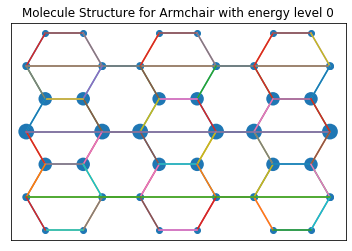

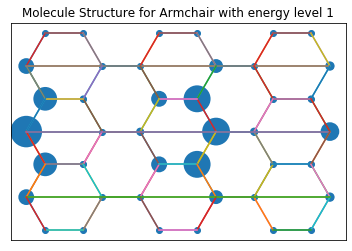

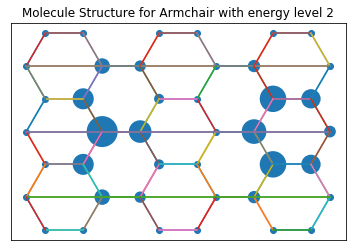

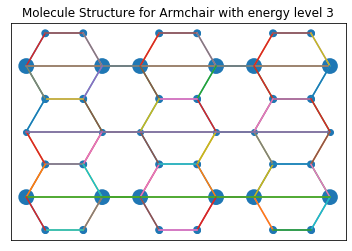

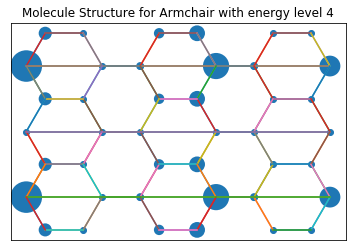

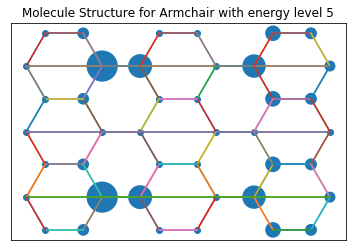

In [6]:
# graphs
armchair.plot_lattice(0)
armchair.plot_lattice(1)
armchair.plot_lattice(2)
armchair.plot_lattice(3)
armchair.plot_lattice(4)
armchair.plot_lattice(5)

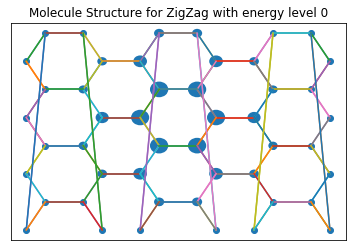

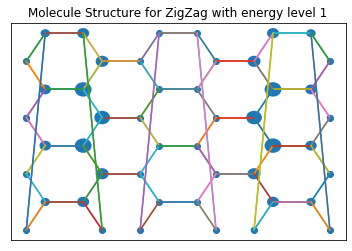

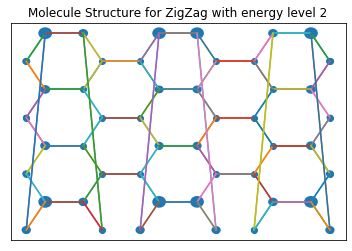

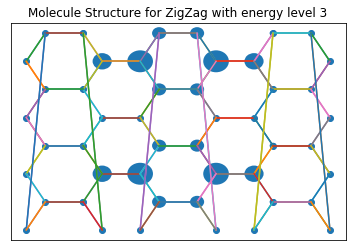

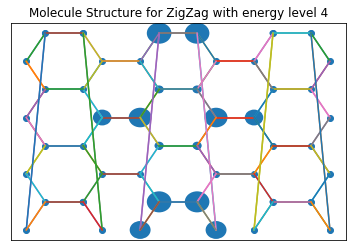

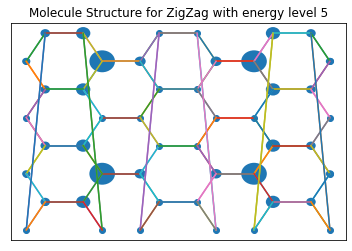

In [7]:
# Show the graphs
zigzag.plot_lattice(0)
zigzag.plot_lattice(1)
zigzag.plot_lattice(2)
zigzag.plot_lattice(3)
zigzag.plot_lattice(4)
zigzag.plot_lattice(5)

/home/nik/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


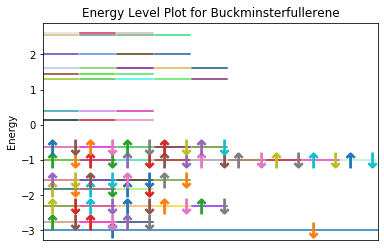

---Buckminsterfullerene--- 
[[ 0. -1.  0. ...  0.  0.  0.]
 [-1.  0. -1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ... -1.  0. -1.]
 [ 0.  0.  0. ...  0. -1.  0.]]
Charge Density :[1.0053520123146829, 1.0248338472916305, 1.0264948666948193, 1.0042289669980475, 1.0250324308198542, 0.9144899230493525, 1.0137305732147814, 1.0475669813166715, 1.0514812290187752, 1.0154563448615, 1.0425511845069735, 0.8685237476457072, 1.036526122872968, 1.039465135549631, 0.9745807985148977, 1.0271582849841234, 0.982860211151297, 0.8532537750164046, 0.9368764160595858, 0.8917402075722832, 0.9530414283067533, 1.038966422816738, 1.2046842011383179, 1.1786160205138358, 1.0155014022049709, 0.9346482262856531, 0.9083087930527247, 1.0494674849876535, 0.8377087614584271, 1.096854199780943, 0.9530414283067532, 1.0389664228167366, 1.2046842011383183, 1.178616020513835, 1.0155014022049695, 0.934648226285653, 0.9083087930527262, 1.0494674849876533, 0.83770876145

In [8]:
# BuckyBall
bucky = Molecule("Buckminsterfullerene", np.matrix([]), 60, 60, 30)
bucky.generate_H()
bucky.add_connections([[1, 5], [1, 9], [2, 12], [3, 15], [4, 18], [6, 20], [7, 22], [8, 25], [10, 26], [11, 29],
                       [13, 30], [14, 33], [16, 34], [17, 37], [19, 38], [21, 40], [23, 42], [24, 44], [27, 45],
                       [28, 47], [31, 48], [32, 50], [35, 51], [36, 53], [39, 54], [41, 55], [43, 57], [46, 58],
                       [49, 59], [52, 60], [56, 60]])
bucky.set_constants(0, -1)
bucky.generate_eigen()
bucky.find_deloc_energy()
bucky.energy_level_plot()
bucky.find_charge_density()
bucky.find_bond_order()
print(bucky)